In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
    
df = pd.read_csv("C:\\Users\\Mouna\\OneDrive\\Pictures\\Desktop\\remade.csv")


df1 = df.copy(deep=True)
df1 = df1.drop(['index','the_geom','the_geom_webmercator','cartodb_id','rw_country_code','rw_country_name','country',
                'cri_rank','fatalities_per_100k_rank','fatalities_rank','losses_per_gdp__rank','losses_usdm_ppp_rank',],axis=1)

df1["losses_per_gdp__total"].fillna(0,inplace=True)

In [2]:
X = df1.iloc[:,:4]
X

,cri_score,fatalities_per_100k_total,fatalities_total,losses_per_gdp__total
0,72.50,0.45,140,0.0001
1,61.50,0.01,1,0.6746
2,66.33,0.05,22,0.0394
3,124.50,0.00,0,0.0000
4,117.33,0.00,0,0.0021
...,...,...,...,...
177,124.50,0.00,0,0.0000
178,124.50,0.00,0,0.0000
179,114.33,0.01,1,0.0012
180,124.50,0.00,0,0.0000


In [3]:
y = df1.iloc[:,5]
y

0       First
1       First
2       First
3      Second
4       Third
        ...  
177     Third
178     Third
179     Third
180     Third
181     Third
Name: world_label, Length: 182, dtype: object

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
svc1 = SVC(kernel='linear')
svc1.fit(X_train,y_train)

SVC(kernel='linear')

In [6]:
y_pred1 = svc1.predict(X_test)
y_pred1

array(['Third', 'Third', 'First', 'Third', 'Third', 'Third', 'Third',
       'Third', 'Third', 'Third', 'First', 'Third', 'Second', 'Third',
       'First', 'Third', 'Third', 'Third', 'Third', 'Third', 'Third',
       'Third', 'Third', 'Third', 'Third', 'First', 'Third', 'Third',
       'First', 'Third', 'Third', 'Third', 'First', 'Third', 'Third',
       'Third', 'Third'], dtype=object)

In [7]:
cm1 = confusion_matrix(y_test,y_pred1)
cm1

array([[ 2,  0,  9],
       [ 2,  1,  6],
       [ 2,  0, 15]], dtype=int64)

In [8]:
accuracy_score(y_test,y_pred1)

0.4864864864864865

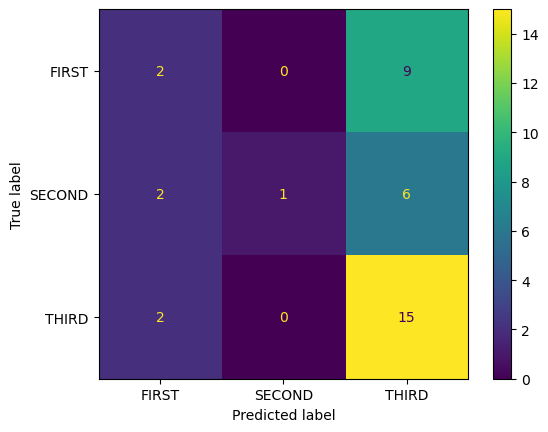

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels=["FIRST","SECOND","THIRD"])
cm_display.plot()
plt.show()